<h2 align="center" style="color:blue">Feature Engineering</h2>

In [1]:
# Import necessary libraries
from imports import *

In [2]:
# Load cleaned train dataset from processed folder
df_train_1 = pd.read_parquet("../data/processed/processed_train_1.parquet")
print("Data loaded successfully:", df_train_1.shape)
df_train_1.head()

Data loaded successfully: (37488, 33)


,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
0,C12747,59,M,Married,Self-Employed,11327000,3,Owned,30,Hyderabad,...,2020-10-31,2020-11-11,4,2,152,20,118,4,36,0
1,C32496,44,F,Single,Salaried,715000,0,Owned,27,Mumbai,...,2022-10-22,2022-10-27,3,1,160,10,62,5,5,0
2,C43676,38,M,Single,Salaried,3195000,0,Mortgage,26,Chennai,...,2023-12-04,2023-12-29,1,1,54,12,67,4,0,0
3,C09041,42,M,Married,Salaried,1500000,2,Mortgage,30,Bangalore,...,2020-06-18,2020-07-07,3,0,76,0,0,8,87,0
4,C13078,58,M,Married,Self-Employed,1817000,4,Owned,29,Pune,...,2020-11-12,2020-12-07,1,2,60,0,0,1,71,0


In [3]:
# Load cleaned test dataset from processed folder
df_test_1 = pd.read_parquet("../data/processed/processed_test_1.parquet")
print("Data loaded successfully:", df_test_1.shape)
df_test_1.head(3)

Data loaded successfully: (12497, 33)


,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
0,C19206,36,M,Married,Self-Employed,3728000,3,Owned,24,Jaipur,...,2021-06-24,2021-07-23,2,1,42,0,0,5,98,0
1,C15515,43,F,Single,Self-Employed,2493000,0,Owned,23,Delhi,...,2021-02-09,2021-02-18,4,0,125,0,0,5,32,0
2,C30368,30,M,Married,Self-Employed,3114000,4,Owned,27,Delhi,...,2022-08-06,2022-08-21,3,0,76,0,0,6,82,0


#### Generate Loan to Income (LTI) Ratio

In [4]:
df_train_1[["loan_amount", "income"]].head(3)

,loan_amount,income
0,23442000,11327000
1,1149000,715000
2,11296000,3195000


In [5]:
df_train_1["loan_to_income"]= round(df_train_1["loan_amount"]/df_train_1["income"],2)
df_train_1["loan_to_income"].describe()

count   37488.00
mean        1.56
std         0.97
min         0.30
25%         0.77
50%         1.16
75%         2.46
max         4.57
Name: loan_to_income, dtype: float64

In [6]:
# Apply the same rule to test data to avoid data leakage and maintain consistency
df_test_1['loan_to_income'] = round(df_test_1['loan_amount'] / df_test_1['income'],2)

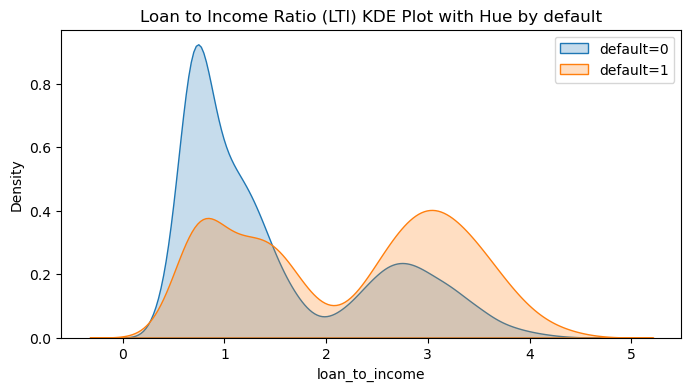

In [7]:
# Plot histogram for LTI with respect to target variable to examine data distribution and skewness
plt.figure(figsize=(8, 4))

sns.kdeplot(df_train_1['loan_to_income'][df_train_1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df_train_1['loan_to_income'][df_train_1['default'] == 1], fill=True, label='default=1')

plt.title(f"Loan to Income Ratio (LTI) KDE Plot with Hue by default")

# Save figure for documentation and reproducibility
plt.savefig("../outputs/figures/LTI_KDE_plot.png", dpi=300)

# Display the histogram
plt.legend()
plt.show()

**Insights**
1. Blue graph has majority of its values on lower side of LTI
2. Orange graph has many values when LTI is higher indicating that higher LTI means high risk loan

#### Generate Delinquency Ratio

In [8]:
df_train_1[["delinquent_months", "total_loan_months"]].head(3)

,delinquent_months,total_loan_months
0,20,152
1,10,160
2,12,54


In [9]:
df_train_1["delinquency_ratio"] = (df_train_1['delinquent_months']*100/df_train_1['total_loan_months']).round(1)

# Apply the same rule to test data to avoid data leakage and maintain consistency
df_test_1["delinquency_ratio"] = (df_test_1['delinquent_months']*100/df_test_1['total_loan_months']).round(1)

In [10]:
df_train_1["delinquency_ratio"].head(2)

0   13.20
1    6.20
Name: delinquency_ratio, dtype: float64

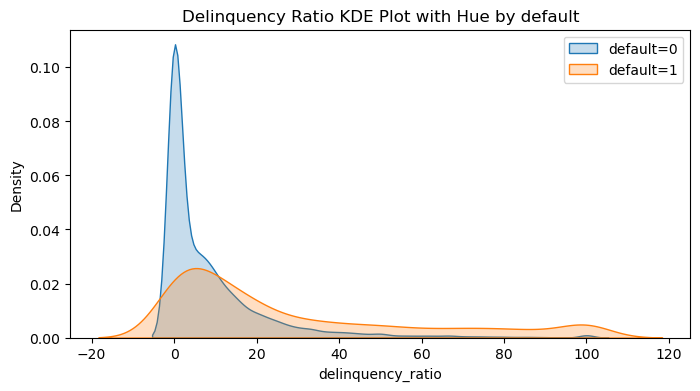

In [11]:
# Plot histogram for Deliquency Ratio with respect to target variable to examine data distribution and skewness
plt.figure(figsize=(8, 4))

sns.kdeplot(df_train_1['delinquency_ratio'][df_train_1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df_train_1['delinquency_ratio'][df_train_1['default'] == 1], fill=True, label='default=1')

plt.title(f"Delinquency Ratio KDE Plot with Hue by default")

# Save figure for documentation and reproducibility
plt.savefig("../outputs/figures/Delinquency_Ratio_KDE_plot.png", dpi=300)

# Display histogram
plt.legend()
plt.show()

This shows that if deliquency_ratio is lower, then it likely not default

#### Generate Avg DPD Per Delinquency

In [12]:
df_train_1['avg_dpd_per_delinquency'] = (df_train_1['total_dpd']/df_train_1['delinquent_months']).round(1)
df_train_1['avg_dpd_per_delinquency'].describe()

count   22400.00
mean        5.50
std         1.41
min         1.00
25%         4.70
50%         5.50
75%         6.30
max        10.00
Name: avg_dpd_per_delinquency, dtype: float64

In [13]:
# Check number of missing values (likely due to division by zero)
df_train_1['avg_dpd_per_delinquency'].isna().sum()

15088

In [14]:
# Replace cases where delinquent_months = 0 with 0 (no delinquencies → avg DPD = 0)
df_train_1['avg_dpd_per_delinquency'] = np.where(
    df_train_1['delinquent_months'] != 0,
(df_train_1['total_dpd']/df_train_1['delinquent_months']).round(1),
0)

# Confirm no missing values remain
df_train_1['avg_dpd_per_delinquency'].isna().sum()

0


### **Handling Missing Values**

While calculating this feature, around **15,088 missing values** appeared.
These were not actual missing values — they occurred due to **division by zero**, i.e., customers with:

* `delinquent_months = 0` (no delinquencies)
* `total_dpd > 0` or `total_dpd = 0`

Since customers with *no* delinquencies should logically have an average delay of **0**, I replaced:

```
avg_dpd_per_delinquency = 0 where delinquent_months = 0
```

After applying this rule, **no missing values remain**, and the feature is now ready for modeling.

In [15]:
df_train_1['avg_dpd_per_delinquency'].describe()

count   37488.00
mean        3.28
std         2.91
min         0.00
25%         0.00
50%         4.30
75%         5.72
max        10.00
Name: avg_dpd_per_delinquency, dtype: float64

In [16]:
# Apply the same rule to test data to avoid data leakage and maintain consistency

df_test_1['avg_dpd_per_delinquency'] = np.where(
    df_test_1['delinquent_months'] != 0,
    (df_test_1['total_dpd'] / df_test_1['delinquent_months']).round(1),
    0
)

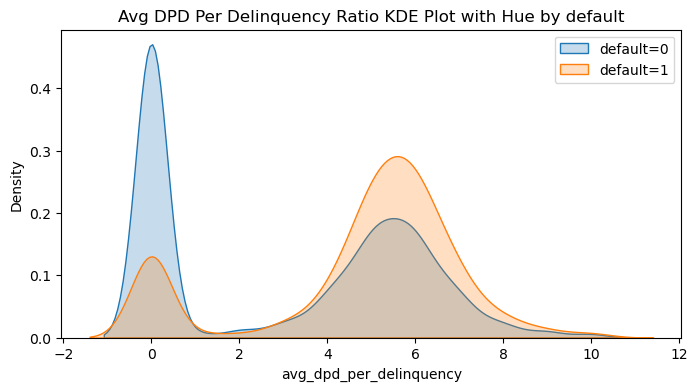

In [17]:
# Plot histogram for Average DPD Per Deliquency with respect to target variable to examine data distribution and skewness
plt.figure(figsize=(8, 4))

sns.kdeplot(df_train_1['avg_dpd_per_delinquency'][df_train_1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df_train_1['avg_dpd_per_delinquency'][df_train_1['default'] == 1], fill=True, label='default=1')

plt.title(f"Avg DPD Per Delinquency Ratio KDE Plot with Hue by default")

# Save figure for documentation and reproducibility
plt.savefig("../outputs/figures/AvgDPD_per_Delinquency_Ratio_KDE_plot.png", dpi=300)

# Display histogram
plt.legend()
plt.show()

**Insights**

1. Graph clearly shows more occurances of default cases when avg_dpd_per_delinquency is high. This means this column is a strong predictor

In [18]:
df_train_1.to_parquet("../data/processed/processed_train_1.parquet", index=False)
print("Processed data saved to ../data/processed/processed_train_1.parquet")

df_test_1.to_parquet("../data/processed/processed_test_1.parquet", index=False)
print("Processed data saved to ../data/processed/processed_test_1.parquet")

Processed data saved to ../data/processed/processed_train_1.parquet
Processed data saved to ../data/processed/processed_test_1.parquet


## Feature Selection

In [19]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income', 'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [20]:
df_train_2 = df_train_1.drop(["cust_id", "loan_id"], axis="columns")

df_test_2 = df_test_1.drop(["cust_id", "loan_id"], axis="columns")

In [21]:
df_train_2.to_parquet("../data/processed/processed_train_2.parquet", index=False)
print("Processed data saved to ../data/processed/processed_train_2.parquet")

df_test_2.to_parquet("../data/processed/processed_test_2.parquet", index=False)
print("Processed data saved to ../data/processed/processed_test_2.parquet")

Processed data saved to ../data/processed/processed_train_2.parquet
Processed data saved to ../data/processed/processed_test_2.parquet


### Remove columns that business contact person asked us to remove

In [22]:
df_train_3 = df_train_2.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income', 
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")
df_test_3 = df_test_2.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income', 
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")
df_train_3.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [23]:
df_train_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37488 entries, 0 to 37487
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          37488 non-null  int64  
 1   gender                       37488 non-null  object 
 2   marital_status               37488 non-null  object 
 3   employment_status            37488 non-null  object 
 4   number_of_dependants         37488 non-null  int64  
 5   residence_type               37488 non-null  object 
 6   years_at_current_address     37488 non-null  int64  
 7   city                         37488 non-null  object 
 8   state                        37488 non-null  object 
 9   zipcode                      37488 non-null  int64  
 10  loan_purpose                 37488 non-null  object 
 11  loan_type                    37488 non-null  object 
 12  sanction_amount              37488 non-null  int64  
 13  processing_fee  

In [24]:
df_train_3.select_dtypes(["int64", "float64"]).columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [25]:
df_train_3.to_parquet("../data/processed/processed_train_3.parquet", index=False)
print("Processed data saved to ../data/processed/processed_train_3.parquet")

df_test_3.to_parquet("../data/processed/processed_test_3.parquet", index=False)
print("Processed data saved to ../data/processed/processed_test_3.parquet")

Processed data saved to ../data/processed/processed_train_3.parquet
Processed data saved to ../data/processed/processed_test_3.parquet


### VIF to measure multicolinearity

### Multicollinearity Check using Variance Inflation Factor (VIF)

To ensure that features are not highly collinear, the **Variance Inflation Factor (VIF)** is calculated for each variable.  
VIF quantifies how much the variance of a regression coefficient is inflated due to multicollinearity.

In [26]:
# Separate features (X) and target variable (y) for train dataset
X_train = df_train_3.drop('default', axis='columns')
y_train = df_train_3['default']

# Select columns to be scaled
cols_to_scale = X_train.select_dtypes(['int64', 'float64']).columns

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply scaling to the selected columns
# This transforms all selected features to a [0, 1] range
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_train.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00
mean,0.41,0.39,0.50,0.52,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.50,0.50,0.44,0.29,0.10,0.33
std,0.19,0.31,0.30,0.29,0.12,0.11,0.11,0.11,0.23,0.24,0.13,0.37,0.41,0.25,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,0.33,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.40,0.40,0.50,0.49,0.05,0.05,0.05,0.05,0.34,0.19,0.08,0.67,0.50,0.50,0.39,0.20,0.04,0.43
75%,0.54,0.60,0.77,0.76,0.10,0.10,0.10,0.10,0.55,0.35,0.16,1.00,1.00,0.62,0.68,0.51,0.13,0.57
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [27]:
# Apply the same rule to test data to avoid data leakage and maintain consistency
X_test = df_test_3.drop('default', axis='columns')
y_test = df_test_3['default']

X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
X_test.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00
mean,0.42,0.38,0.50,0.53,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.50,0.50,0.44,0.29,0.11,0.33
std,0.19,0.31,0.30,0.29,0.12,0.11,0.11,0.11,0.23,0.25,0.13,0.37,0.41,0.25,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,0.33,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.42,0.40,0.50,0.51,0.05,0.05,0.05,0.05,0.34,0.20,0.08,0.33,0.50,0.50,0.39,0.20,0.04,0.44
75%,0.54,0.60,0.77,0.76,0.10,0.09,0.09,0.09,0.55,0.36,0.16,0.67,1.00,0.62,0.68,0.50,0.13,0.58
max,1.00,1.00,1.00,1.00,0.98,0.96,0.96,0.96,1.00,1.00,0.94,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [28]:
# Save train/test splits
X_train.to_parquet("../data/processed/X_train.parquet")

# Save target variable (y) as a Parquet file
# Converting to DataFrame only for saving; will load as Series in the next notebook
y_train.to_frame().to_parquet("../data/processed/y_train.parquet", index=False)


X_test.to_parquet("../data/processed/X_test.parquet")

# Save target variable (y) as a Parquet file
# Converting to DataFrame only for saving; will load as Series in the next notebook
y_test.to_frame().to_parquet("../data/processed/y_test.parquet", index=False)

In [29]:
# Save the MinMaxScaler object for future use (inverse scaling & model deployment)
dump(scaler, "../outputs/models/minmax_scaler.pkl")  
print("Scaler saved successfully.")

Scaler saved successfully.


In [30]:
dump(cols_to_scale, "../outputs/models/cols_to_scale.pkl")

print("cols_to_scale saved successfully.")

cols_to_scale saved successfully.


In [31]:
# Function to calculate Variance Inflation Factor (VIF)
def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [32]:
# Calculate VIF for all features
vif_before = calculate_vif(X_train[cols_to_scale])

# Display the initial VIF table
display(vif_before)

/Users/ruchithau/anaconda3/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Column,VIF
0,age,5.70
1,number_of_dependants,2.73
2,years_at_current_address,3.42
3,zipcode,3.80
4,sanction_amount,101.09
5,processing_fee,inf
6,gst,inf
7,net_disbursement,inf
8,loan_tenure_months,6.18
9,principal_outstanding,16.33


In [33]:
features_to_drop_vif = ['sanction_amount', 'processing_fee', 'gst', 'net_disbursement', 'principal_outstanding']

X_train_1 = X_train.drop(features_to_drop_vif, axis='columns')

In [34]:
dump(features_to_drop_vif, "../outputs/models/features_to_drop_vif.pkl")

['../outputs/models/features_to_drop_vif.pkl']

In [35]:
# Save train/test splits
X_train_1.to_parquet("../data/processed/X_train_1.parquet")

In [36]:
numeric_columns = X_train_1.select_dtypes(['int64', 'float64']).columns
numeric_columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [37]:
dump(numeric_columns, "../outputs/models/numeric_columns.pkl")

print("numeric columns saved successfully.")

numeric columns saved successfully.


In [38]:
# Recalculate VIF after removing the redundant feature
vif_after = calculate_vif(X_train_1[numeric_columns])
display(vif_after)

,Column,VIF
0,age,5.43
1,number_of_dependants,2.73
2,years_at_current_address,3.40
3,zipcode,3.78
4,loan_tenure_months,6.02
5,bank_balance_at_application,1.80
6,number_of_open_accounts,4.35
7,number_of_closed_accounts,2.37
8,enquiry_count,6.38
9,credit_utilization_ratio,2.92


In [39]:
# Save VIF results to CSV files
vif_before.to_csv("../outputs/tables/vif_before_reduction.csv", index=False)
vif_after.to_csv("../outputs/tables/vif_after_reduction.csv", index=False)

In [40]:
selected_numeric_features_vif = vif_after.Column.values
selected_numeric_features_vif

array(['age', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'enquiry_count', 'credit_utilization_ratio', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'], dtype=object)

In [41]:
dump(selected_numeric_features_vif, "../outputs/models/selected_numeric_features_vif.pkl")

print("Selected numeric features saved successfully.")

Selected numeric features saved successfully.


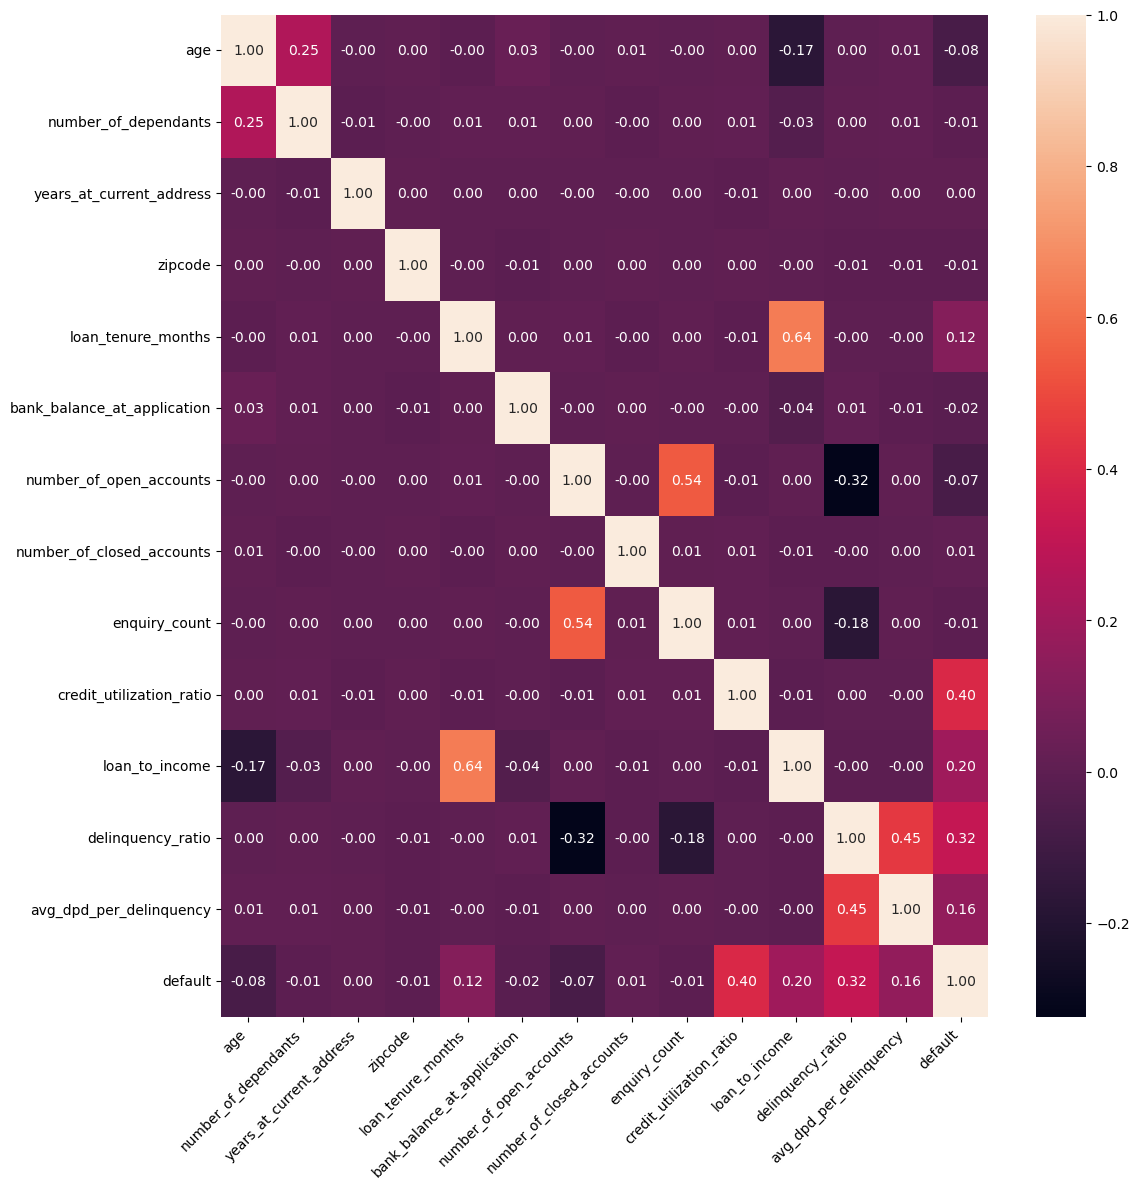

In [42]:
# Set figure size for better readability
plt.figure(figsize=(12,12))

# Compute correlation matrix for all numerical features
cm = df_train_3[numeric_columns.append(pd.Index(['default']))].corr()

# Plot heatmap with correlation coefficients
sns.heatmap(cm, annot=True, fmt='0.2f')

# Rotate axis labels for clarity
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Adjust layout to prevent label overlap
plt.tight_layout()

# Save figure for documentation and reproducibility
plt.savefig("../outputs/figures/fe_correlation_heatmap.png", dpi=300)

# Display the heatmap
plt.show()

### Feature Selection: Categorical Features

In [43]:
categorical_columns = load("../outputs/models/categorical_columns.pkl")

print(categorical_columns)

['gender', 'marital_status', 'employment_status', 'residence_type', 'city', 'state', 'zipcode', 'loan_purpose', 'loan_type', 'default']


In [44]:
X_train_1.head()

,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,...,loan_type,loan_tenure_months,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
0,0.79,M,Married,Self-Employed,0.60,Owned,0.97,Hyderabad,Telangana,0.66,...,Secured,0.42,0.61,1.00,1.00,0.38,0.36,0.41,0.13,0.59
1,0.50,F,Single,Salaried,0.00,Owned,0.87,Mumbai,Maharashtra,0.49,...,Secured,0.83,0.03,0.67,0.50,0.50,0.05,0.31,0.06,0.62
2,0.38,M,Single,Salaried,0.00,Mortgage,0.83,Chennai,Tamil Nadu,0.83,...,Secured,0.49,0.17,0.00,0.50,0.38,0.00,0.76,0.22,0.56
3,0.46,M,Married,Salaried,0.40,Mortgage,0.97,Bangalore,Karnataka,0.76,...,Secured,0.64,0.08,0.67,0.00,0.88,0.88,0.19,0.00,0.00
4,0.77,M,Married,Self-Employed,0.80,Owned,0.93,Pune,Maharashtra,0.51,...,Unsecured,0.17,0.07,0.00,1.00,0.00,0.72,0.05,0.00,0.00


### Calculate WOE and IV

In [45]:
# Function to calculate Weight of Evidence(WOE) and Information Value (IV)
def calculate_woe_iv(df, feature, target):
    grouped = df.groupby(feature)[target].agg(['count','sum'])
    grouped = grouped.rename(columns={'count': 'total', 'sum': 'good'})
    grouped['bad']=grouped['total']-grouped['good']
    
    total_good = grouped['good'].sum()
    total_bad = grouped['bad'].sum()
    
    grouped['good_pct'] = grouped['good'] / total_good
    grouped['bad_pct'] = grouped['bad'] / total_bad
    
    grouped['woe'] = np.log(grouped['good_pct']/ grouped['bad_pct'])
    grouped['iv'] = (grouped['good_pct'] -grouped['bad_pct'])*grouped['woe']
    
    # Handling infinite values
    grouped['woe'] = grouped['woe'].replace([np.inf, -np.inf], 0)
    grouped['iv'] = grouped['iv'].replace([np.inf, -np.inf], 0)
    
    total_iv = grouped['iv'].sum()
    
    return grouped, total_iv

In [46]:
grouped, total_iv = calculate_woe_iv(pd.concat([X_train_1, y_train],axis=1), 'loan_purpose', 'default')
grouped

,total,good,bad,good_pct,bad_pct,woe,iv
loan_purpose,,,,,,,
Auto,7447,327,7120,0.10,0.21,-0.72,0.08
Education,5620,559,5061,0.17,0.15,0.16,0.00
Home,11304,1734,9570,0.54,0.28,0.66,0.17
Personal,13117,603,12514,0.19,0.37,-0.67,0.12


In [47]:
# Total information for loan_purpose feature
total_iv

0.3691197842282755

In [48]:
X_train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37488 entries, 0 to 37487
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          37488 non-null  float64
 1   gender                       37488 non-null  object 
 2   marital_status               37488 non-null  object 
 3   employment_status            37488 non-null  object 
 4   number_of_dependants         37488 non-null  float64
 5   residence_type               37488 non-null  object 
 6   years_at_current_address     37488 non-null  float64
 7   city                         37488 non-null  object 
 8   state                        37488 non-null  object 
 9   zipcode                      37488 non-null  float64
 10  loan_purpose                 37488 non-null  object 
 11  loan_type                    37488 non-null  object 
 12  loan_tenure_months           37488 non-null  float64
 13  bank_balance_at_

In [49]:
iv_values = {}

for feature in X_train_1.columns:
    if X_train_1[feature].dtype == 'object':
        _, iv = calculate_woe_iv(pd.concat([X_train_1, y_train], axis=1), feature, 'default')
        
    else:
        X_binned = pd.cut(X_train_1[feature], bins=10, labels=False)
        _, iv = calculate_woe_iv(pd.concat([X_binned, y_train], axis=1), feature, 'default')
    
    iv_values[feature] = iv

iv_values

{'age': 0.0890689462679479,
 'gender': 0.00047449502170914947,
 'marital_status': 0.001129766845390142,
 'employment_status': 0.003953046301722585,
 'number_of_dependants': 0.0019380899135053508,
 'residence_type': 0.246745268718145,
 'years_at_current_address': 0.0020800513608156363,
 'city': 0.0019059578709781529,
 'state': 0.0019005589806779287,
 'zipcode': 0.0016677413243392572,
 'loan_purpose': 0.3691197842282755,
 'loan_type': 0.16319324904149224,
 'loan_tenure_months': 0.21893515090196278,
 'bank_balance_at_application': 0.0063187993277516365,
 'number_of_open_accounts': 0.08463134083005877,
 'number_of_closed_accounts': 0.0011964272592421567,
 'enquiry_count': 0.007864214085342608,
 'credit_utilization_ratio': 2.352965568168245,
 'loan_to_income': 0.476415456948364,
 'delinquency_ratio': 0.716576108689321,
 'avg_dpd_per_delinquency': 0.40151905412190175}

In [50]:
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

iv_df = pd.DataFrame(list(iv_values.items()), columns=['Feature', 'IV'])
iv_df = iv_df.sort_values(by='IV', ascending=False)
iv_df

,Feature,IV
17,credit_utilization_ratio,2.353
19,delinquency_ratio,0.717
18,loan_to_income,0.476
20,avg_dpd_per_delinquency,0.402
10,loan_purpose,0.369
5,residence_type,0.247
12,loan_tenure_months,0.219
11,loan_type,0.163
0,age,0.089
14,number_of_open_accounts,0.085


In [51]:
# Save iv_df
iv_df.to_parquet('../outputs/models/iv_results.parquet', index=False)

print("Saved iv values successfully.")

Saved iv values successfully.


#### Feature Selection using IV

In [52]:
# select features that has IV > 0.02
selected_features_iv = [feature for feature, iv in iv_values.items() if iv > 0.02]
selected_features_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquency_ratio',
 'avg_dpd_per_delinquency']

In [53]:
dump(selected_features_iv, "../outputs/models/selected_features_iv.pkl")

print("Selected features using IV saved successfully.")

Selected features using IV saved successfully.


### Feature Encoding

In [54]:
X_train_reduced = X_train_1[selected_features_iv]
X_test_reduced = X_test[selected_features_iv]

In [55]:
# Applying one-hot encoding for the selected categorical features
X_train_encoded = pd.get_dummies(X_train_reduced, drop_first=True)
X_train_encoded.head(3)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
0,0.788,0.415,1.000,0.364,0.415,0.132,0.590,1,0,0,1,0,0
1,0.500,0.830,0.667,0.051,0.307,0.062,0.620,1,0,1,0,0,0
2,0.385,0.491,0.000,0.000,0.759,0.222,0.560,0,0,0,1,0,0


In [56]:
# Applying the same for test data
X_test_encoded = pd.get_dummies(X_test_reduced, drop_first=True)
X_test_encoded.head(3)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
0,0.346,0.755,0.333,0.990,0.550,0.000,0.000,1,0,0,1,0,0
1,0.481,0.226,1.000,0.323,0.220,0.000,0.000,1,0,1,0,0,0
2,0.231,0.547,0.667,0.828,0.180,0.000,0.000,1,0,0,0,0,0


In [57]:
# Convert all column names to lowercase for consistency
X_train_encoded.columns = X_train_encoded.columns.str.lower()

# Verifying resulting dataframe
X_train_encoded.head(2)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_owned,residence_type_rented,loan_purpose_education,loan_purpose_home,loan_purpose_personal,loan_type_unsecured
0,0.788,0.415,1.000,0.364,0.415,0.132,0.590,1,0,0,1,0,0
1,0.500,0.830,0.667,0.051,0.307,0.062,0.620,1,0,1,0,0,0


In [58]:
# Convert all column names to lowercase for consistency
X_test_encoded.columns = X_test_encoded.columns.str.lower()

# Verifying resulting dataframe
X_test_encoded.head(2)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_owned,residence_type_rented,loan_purpose_education,loan_purpose_home,loan_purpose_personal,loan_type_unsecured
0,0.346,0.755,0.333,0.990,0.550,0.000,0.000,1,0,0,1,0,0
1,0.481,0.226,1.000,0.323,0.220,0.000,0.000,1,0,1,0,0,0


In [59]:
# Save final feature matrix (X_train_encoded) for model training
X_train_encoded.to_parquet("../data/processed/final_X_train.parquet", index=False)

# Save target variable (y_train) as a Parquet file
# Converting to DataFrame only for saving; will load as Series in the next notebook
y_train.to_frame().to_parquet("../data/processed/final_y_train.parquet", index=False)

print("Saved X_train_encoded and y_train for model training.")

Saved X_train_encoded and y_train for model training.


In [60]:
# Save final test feature matrix (X_test_encoded) for model training
X_test_encoded.to_parquet("../data/processed/final_X_test.parquet", index=False)

# Save target variable (y_test) as a Parquet file
# Converting to DataFrame only for saving; will load as Series in the next notebook
y_test.to_frame().to_parquet("../data/processed/final_y_test.parquet", index=False)

print("Saved X_test_encoded and y_test for model training.")

Saved X_test_encoded and y_test for model training.


In [61]:
(X_train_encoded.shape, y_train.shape)

((37488, 13), (37488,))

In [62]:
(X_test_encoded.shape, y_test.shape)

((12497, 13), (12497,))